In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in data.

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


# Exploration

In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [6]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In the data, the bus route can be identified by its ROUTE_ABBR value.  
3: West End  
7: Hillsboro  
22: Bordeaux  
23: Dickerson Pike  
50: Charlotte Pike  
52: Nolensville Pike  
55: Murfreesboro Pike  
56: Gallatin Pike  

In [7]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [8]:
wego['SERVICE_ABBR'].value_counts().sort_index()

SERVICE_ABBR
1    279300
2     37497
3     33532
Name: count, dtype: int64

In [9]:
#wego['HDWY_DEV']

In [10]:
wego['ADHERENCE'].count()

338861

In [11]:
wego['ADHERENCE'].max()

88.383333

In [12]:
wego['ADHERENCE'].mean()

-3.1887964314276354

In [13]:
wego['ADHERENCE'].nsmallest(75)

103162   -948.533333
19788    -675.000000
340625   -618.166666
30377    -542.233333
229460   -539.933333
106535   -489.316666
133942   -480.900000
326620   -480.866666
229519   -466.366666
269889   -400.533333
120932   -379.550000
308795   -375.233333
22974    -373.466666
68208    -366.933333
229708   -340.966666
212919   -330.166666
224905   -322.783333
265400   -295.466666
19876    -283.866666
3231     -241.700000
129861   -219.900000
20536    -194.000000
333130   -166.566666
209473   -149.816666
209474   -144.333333
209475   -141.183333
209477   -140.066666
209478   -140.050000
326622   -139.683333
209476   -138.800000
209479   -137.033333
155177   -134.100000
3250     -133.950000
21295    -133.250000
3249     -133.133333
53134    -132.883333
3251     -132.200000
3248     -132.033333
21296    -131.900000
330228   -128.550000
21297    -128.416666
330229   -128.100000
329793   -126.966666
257235   -126.516666
257232   -126.466666
3246     -126.300000
256791   -126.216666
329794   -125

<Axes: ylabel='ADHERENCE'>

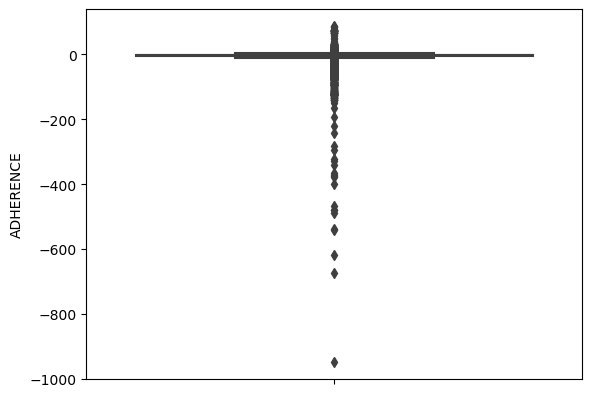

In [14]:
sns.boxplot(y="ADHERENCE",
                data=wego)

According to boxplot of adherence, most outliers are of the buses running late.

<Axes: ylabel='HDWY_DEV'>

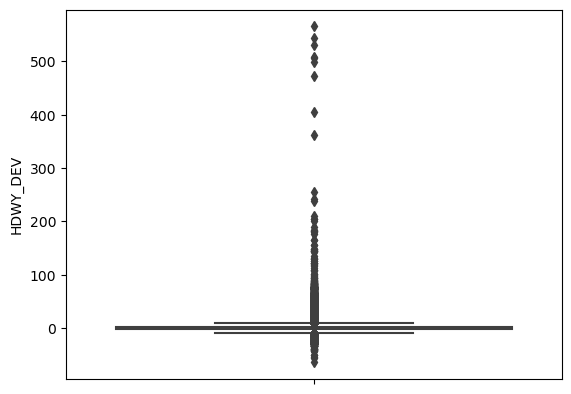

In [15]:
sns.boxplot(y='HDWY_DEV',
                data=wego)

According to boxplot of HDWY_DEV, most outliers are of 

Look at percentages of on time vs dataset.

In [16]:
wego['ADJUSTED_ONTIME_COUNT'].sum() / wego.shape[0]

0.7708411236295025

In [17]:
# Percent of on-time stops - using only tagged rows
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.69

Look at percentages of early vs dataset.

In [18]:
wego['ADJUSTED_EARLY_COUNT'].sum() / wego.shape[0]

0.027902343225939045

In [19]:
# Percent of early - using only tagged rows
round((wego['ADJUSTED_EARLY_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

2.88

Look at percentages of late vs dataset.

In [20]:
wego['ADJUSTED_LATE_COUNT'].sum() / wego.shape[0]

0.16852158970567666

In [21]:
# Percent of late - using only tagged rows
round((wego['ADJUSTED_LATE_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

17.42

In [22]:
#Difference in percent toals when excluding NaN values for Late, Early, and On time counts.
print(77.08 + 2.79 + 16.85)
print(79.69 + 2.88 + 17.42)
print("Correct answer is 99.99")

96.72
99.99
Correct answer is 99.99


In [23]:
#find rows that do not have a value for adjusted on time, early, or late count.
zero_counts = wego[(wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0)]

In [24]:
zero_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11468 entries, 39 to 350321
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CALENDAR_ID                11468 non-null  int64  
 1   SERVICE_ABBR               11468 non-null  int64  
 2   ADHERENCE_ID               11468 non-null  int64  
 3   DATE                       11468 non-null  object 
 4   ROUTE_ABBR                 11468 non-null  int64  
 5   BLOCK_ABBR                 11468 non-null  int64  
 6   OPERATOR                   11468 non-null  int64  
 7   TRIP_ID                    11468 non-null  int64  
 8   OVERLOAD_ID                11468 non-null  int64  
 9   ROUTE_DIRECTION_NAME       11468 non-null  object 
 10  TIME_POINT_ABBR            11468 non-null  object 
 11  ROUTE_STOP_SEQUENCE        11462 non-null  float64
 12  TRIP_EDGE                  11468 non-null  int64  
 13  LATITUDE                   11468 non-null  float6

In [25]:
wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [26]:
zero_counts.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
350249,120230930,2,100406533,2023-09-30,7,701,2531,353393,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 23:29:00,NaN,NaN,NaN,30.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350295,120230930,2,100406581,2023-09-30,7,702,2312,353438,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 16:03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350313,120230930,2,100406599,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 20:33:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 21:38:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 21:59:00,NaN,NaN,NaN,30.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN


In [27]:
zero_counts["IS_RELIEF"].sum()

133

In [28]:
zero_counts['STOP_CANCELLED'].sum()

2479

In [29]:
wego['IS_RELIEF'].sum()

4188

In [30]:
wego['STOP_CANCELLED'].sum()

5347

In [31]:
wego['PREV_SCHED_STOP_CANCELLED'].sum()

4254.0

In [32]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


# Clean data 

In [33]:
wego[wego['PREV_SCHED_STOP_CANCELLED']>=1].sort_values('HDWY_DEV',ascending=False).head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
270201,120230917,3,100026077,2023-09-17,23,2313,2669,350602,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-17 17:06:00,2023-09-17 17:07:10,2023-09-17 17:07:10,-1.166666,25.0,568.833333,543.833333,0,0,1,0,1.0,0,0.0,NaN
187823,120230902,2,100388178,2023-09-02,23,2311,2221,350442,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-02 16:16:00,2023-09-02 16:16:02,2023-09-02 16:16:02,-0.033333,25.0,523.066666,498.066666,0,0,1,1,1.0,0,0.0,NaN
141314,120230825,1,100168684,2023-08-25,23,2310,3120,350355,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-25 23:44:00,2023-08-27 00:12:48,2023-08-26 00:12:48,-28.800000,30.0,391.033333,361.033333,0,1,0,0,1.0,0,0.0,NaN
227462,120230909,2,100580899,2023-09-09,52,5212,2138,352236,1,FROM DOWNTOWN,HCKP,9.0,0,36.048934,-86.713854,2023-09-10 00:27:00,2023-09-12 00:35:35,2023-09-11 00:35:35,-8.583333,29.0,284.783333,255.783333,0,1,0,0,1.0,0,0.0,NaN
226,120230801,1,99458120,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,YGKG,7.0,0,36.203239,-86.840636,2023-08-01 10:02:00,2023-08-01 10:03:38,2023-08-01 10:03:38,-1.633333,45.0,226.816666,181.816666,0,0,1,1,1.0,0,0.0,NaN


In [34]:
#removing rows where prev sched stop cancelled is marked.
wego = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]

In [35]:
#removing rows where SCHEDULED_HDWY = 0.00 which caused infinite values.
wego = wego[wego['SCHEDULED_HDWY']!=0.00]

df = df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))]  
~ negates and keeps rows that don't meet the criteria.

In [36]:
#removing nan rows where ontime, early, and late counts are all = 0.
wego_clean = wego.loc[~((wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0))]

In [37]:
#getting clean adherence and hdwy_dev to use in percentile calculations.
adherence = wego_clean['ADHERENCE']
adherence_cleaned = adherence.dropna()
hdwy_dev = wego_clean['HDWY_DEV']
hdwy_dev_cleaned = hdwy_dev.dropna()

In [38]:
#find the 1st and 99th percentile of adherence.
adherence_1 = np.percentile(adherence_cleaned,0.1)
adherence_99 = np.percentile(adherence_cleaned,99.9)
print(adherence_1)
print(adherence_99)

-57.04575
9.463832695001242


In [39]:
#find the 1st and 99th percentile of hdwy_dev
hdwy_dev_1 = np.percentile(hdwy_dev_cleaned,0.1)
hdwy_dev_99 = np.percentile(hdwy_dev_cleaned,99.9)
print(hdwy_dev_1)
print(hdwy_dev_99)

-21.626300526
56.439450000000946


In [40]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335086 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                335086 non-null  int64  
 1   SERVICE_ABBR               335086 non-null  int64  
 2   ADHERENCE_ID               335086 non-null  int64  
 3   DATE                       335086 non-null  object 
 4   ROUTE_ABBR                 335086 non-null  int64  
 5   BLOCK_ABBR                 335086 non-null  int64  
 6   OPERATOR                   335086 non-null  int64  
 7   TRIP_ID                    335086 non-null  int64  
 8   OVERLOAD_ID                335086 non-null  int64  
 9   ROUTE_DIRECTION_NAME       335086 non-null  object 
 10  TIME_POINT_ABBR            335086 non-null  object 
 11  ROUTE_STOP_SEQUENCE        335081 non-null  float64
 12  TRIP_EDGE                  335086 non-null  int64  
 13  LATITUDE                   335086 

Next need to remove values outside of the percentile ranges of adherence and hdwy.

In [41]:
wego_clean = wego_clean.drop(wego_clean[wego_clean.ADHERENCE < adherence_1].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.ADHERENCE > adherence_99].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.HDWY_DEV < hdwy_dev_1].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.HDWY_DEV > hdwy_dev_99].index)

In [42]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333924 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                333924 non-null  int64  
 1   SERVICE_ABBR               333924 non-null  int64  
 2   ADHERENCE_ID               333924 non-null  int64  
 3   DATE                       333924 non-null  object 
 4   ROUTE_ABBR                 333924 non-null  int64  
 5   BLOCK_ABBR                 333924 non-null  int64  
 6   OPERATOR                   333924 non-null  int64  
 7   TRIP_ID                    333924 non-null  int64  
 8   OVERLOAD_ID                333924 non-null  int64  
 9   ROUTE_DIRECTION_NAME       333924 non-null  object 
 10  TIME_POINT_ABBR            333924 non-null  object 
 11  ROUTE_STOP_SEQUENCE        333919 non-null  float64
 12  TRIP_EDGE                  333924 non-null  int64  
 13  LATITUDE                   333924 

# Q1 What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [43]:
# Percent of on-time stops - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_ONTIME_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.9

In [129]:
#shorter code for same answer.
round((wego_clean
 ['ADJUSTED_ONTIME_COUNT']
 .mean()
)*100,2)

79.9

In [130]:
# Percent of early count
round((wego_clean
 ['ADJUSTED_EARLY_COUNT']
 .mean()
)*100,2)

2.83

In [131]:
# Percent of late count
round((wego_clean
 ['ADJUSTED_LATE_COUNT']
 .mean()
)*100,2)

17.27

On-time performance shows that the busses are on time 79.76% of the time.

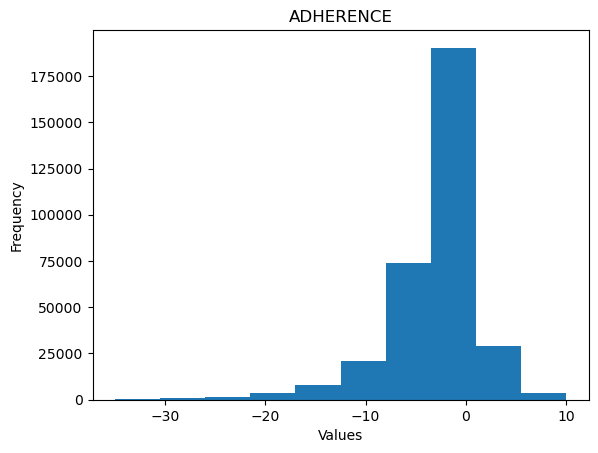

In [47]:
plt.hist(wego_clean["ADHERENCE"], bins=10, range=(-35,10) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("ADHERENCE")
plt.show()

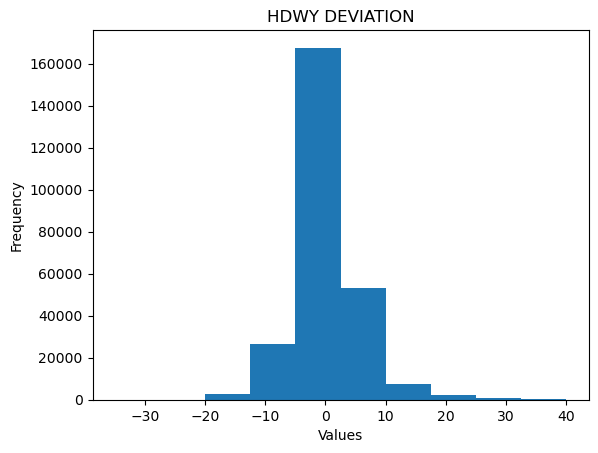

In [48]:
plt.hist(wego_clean["HDWY_DEV"], bins=10, range=(-35,40) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION")
plt.show()

# Create additional HDWY category columns: HDWY_DEV_Percentage, BUNCHING, GAPPING, NORMAL_HDWY

In [49]:
wego_clean['HDWY_DEV_PERCENTAGE'] = wego_clean['HDWY_DEV'] / wego_clean['SCHEDULED_HDWY'] *100

In [50]:
wego_clean['HDWY_DEV_PERCENTAGE'].min()

-100.0

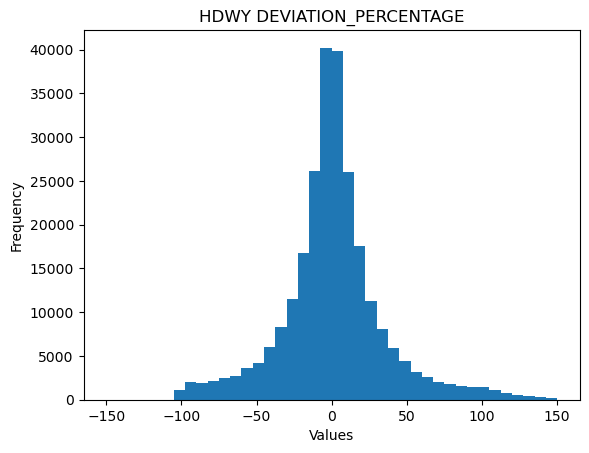

In [51]:
#checking to make sure deviation percentages make sense.
plt.hist(wego_clean["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150,150) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION_PERCENTAGE")
plt.show()

In [53]:
#create BUNCHING column and set condition to 1 if less than -50
wego_clean['BUNCHING'] = np.where(wego_clean['HDWY_DEV_PERCENTAGE'] 
                       < -50, '1','0')

In [54]:
wego_clean['BUNCHING'].value_counts()

BUNCHING
0    316682
1     17242
Name: count, dtype: int64

In [55]:
#create GAPPING column and set condition to 1 if greater than 50
wego_clean['GAPPING'] = np.where(wego_clean['HDWY_DEV_PERCENTAGE'] 
                       > 50, '1','0')

In [56]:
wego_clean['GAPPING'].value_counts()

GAPPING
0    313362
1     20562
Name: count, dtype: int64

In [57]:
#create NORMAL_HDWY column and set condition to 1 if >= than -50 and <= 50.
wego_clean['NORMAL_HDWY'] = np.where((wego_clean['HDWY_DEV_PERCENTAGE'] 
                       >= -50)&(wego_clean['HDWY_DEV_PERCENTAGE'] 
                       <= 50), '1','0')

In [58]:
wego_clean['NORMAL_HDWY'].value_counts()

NORMAL_HDWY
1    223481
0    110443
Name: count, dtype: int64

In [59]:
#create HDWY_NULL column and set condition to 1 if >= than -50 and <= 50.
wego_clean['HDWY_NULL'] = np.where(wego_clean['HDWY_DEV_PERCENTAGE'].isna()==True,'1','0')

In [60]:
wego_clean[['BUNCHING','GAPPING','NORMAL_HDWY','HDWY_NULL']].value_counts().sort_values().reset_index()

,BUNCHING,GAPPING,NORMAL_HDWY,HDWY_NULL,count
0,1,0,0,0,17242
1,0,1,0,0,20562
2,0,0,0,1,72639
3,0,0,1,0,223481


In [ ]:
#convert data types for bunching, gapping, and normal_hdwy from objects to floats.
wego_clean = wego_clean.astype({'BUNCHING': float, 'GAPPING': float, 'NORMAL_HDWY': float, 'HDWY_NULL': float})

In [155]:
#dropping where SCHEDULED_HDWY = NaN, which causes BUNCHING GAPPING and NORMAL_HDWY to not add up to 100%.
wego_hdwy = wego_clean.dropna(subset=['SCHEDULED_HDWY'])

# Q2 How does direction of travel, route, or location affect the headway and on-time performance?

In [63]:
wego_clean.ROUTE_DIRECTION_NAME.value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    176991
TO DOWNTOWN      156933
Name: count, dtype: int64

In [64]:
#create from down town and to downtown 
wego_from_downtown = wego_clean[wego_clean['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN']
wego_to_downtown = wego_clean[wego_clean['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']

In [156]:
trip_direction_ontime = wego_clean.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']].mean()

In [157]:
trip_direction_ontime

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,0.752236,0.028877,0.218887
TO DOWNTOWN,0.851701,0.027585,0.120714


From Downtown has an ontime percentage of 75.2% and To Downtown has an 85.2%.

Look at histograms for to and from downtown.

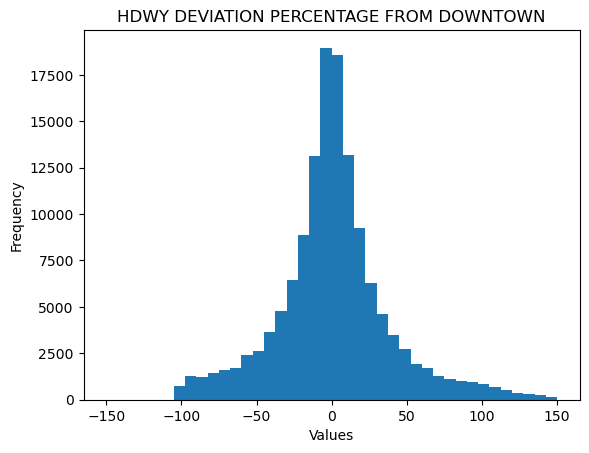

In [65]:
plt.hist(wego_from_downtown["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150,150) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION PERCENTAGE FROM DOWNTOWN")
plt.show()

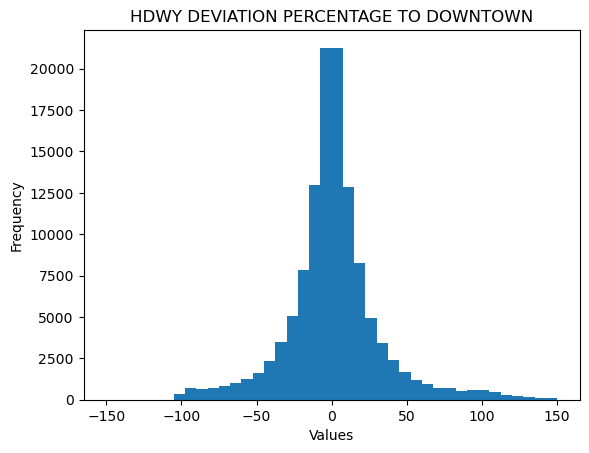

In [66]:
plt.hist(wego_to_downtown["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150,150) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION PERCENTAGE TO DOWNTOWN")
plt.show()

In [159]:
trip_direction_hdwy = wego_hdwy.groupby('ROUTE_DIRECTION_NAME')[['NORMAL_HDWY','GAPPING','BUNCHING']].mean()
trip_direction_hdwy

,NORMAL_HDWY,GAPPING,BUNCHING
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,0.825684,0.093118,0.080660
TO DOWNTOWN,0.888115,0.062164,0.049189


In [154]:
#Percentage of HDWY by route.
(wego_hdwy
 .groupby('ROUTE_ABBR')
 [['NORMAL_HDWY','GAPPING','BUNCHING']]
 .mean()
)

,NORMAL_HDWY,GAPPING,BUNCHING
ROUTE_ABBR,,,
3,0.864669,0.076727,0.058078
7,0.912330,0.050273,0.037396
22,0.939642,0.041508,0.017771
23,0.914219,0.063451,0.021686
50,0.933656,0.036569,0.029454
52,0.837162,0.089238,0.071920
55,0.741523,0.127037,0.131419
56,0.844897,0.080051,0.074884


In [162]:
#Percentage of ontime by route.
(wego_clean
 .groupby('ROUTE_ABBR')
 [['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
 .mean()
)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_ABBR,,,
3,0.760399,0.029886,0.209715
7,0.779921,0.022055,0.198024
22,0.892930,0.025353,0.081716
23,0.887926,0.031579,0.080495
50,0.853307,0.027919,0.118774
52,0.769609,0.030679,0.199712
55,0.700198,0.025224,0.274579
56,0.822441,0.029173,0.148385


In [77]:
round(wego_clean.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HDWY_DEV', 'mean'), Adherence=('ADHERENCE', 'mean')),2)

,HeadwayDeviation,Adherence
ROUTE_ABBR,,
3,0.54,-3.71
7,0.33,-3.48
22,0.57,-1.07
23,0.82,-1.64
50,0.17,-2.42
52,0.71,-3.73
55,0.19,-4.62
56,0.12,-2.65


Route 22 had the highest ontime performance.

# Q3 How does time of day or day of week affect headway and on-time performance?

Convert SCHEDULED_TIME to datetime format.

In [89]:
wego_clean['DATE_TIME'] = pd.to_datetime(wego_clean['SCHEDULED_TIME'])

Add columns for month, day, hour, day_name.

In [90]:
wego_clean['MONTH'] = wego_clean['DATE_TIME'].dt.month
wego_clean['DAY'] = wego_clean['DATE_TIME'].dt.day
wego_clean['HOUR'] = wego_clean['DATE_TIME'].dt.hour
wego_clean['DAY_NAME'] = wego_clean['DATE_TIME'].dt.day_name()

<Axes: xlabel='HOUR', ylabel='ADJUSTED_ONTIME_COUNT'>

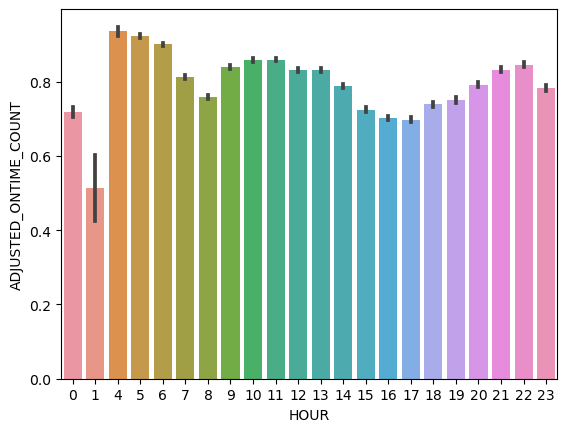

In [94]:
sns.barplot(wego_clean, x='HOUR', y='ADJUSTED_ONTIME_COUNT')

<Axes: xlabel='DAY_NAME', ylabel='ADJUSTED_ONTIME_COUNT'>

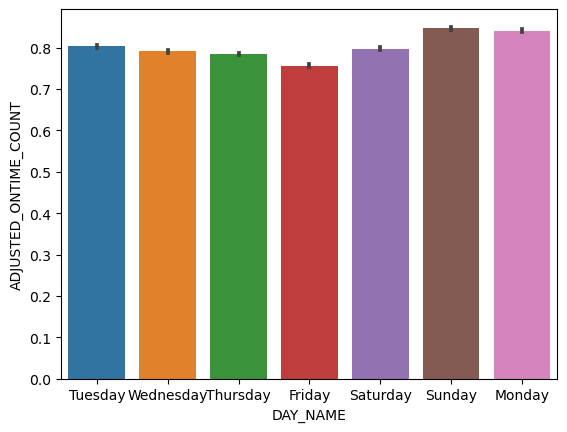

In [95]:
sns.barplot(wego_clean, x='DAY_NAME', y='ADJUSTED_ONTIME_COUNT')

<Axes: xlabel='DAY_NAME', ylabel='ADJUSTED_ONTIME_COUNT'>

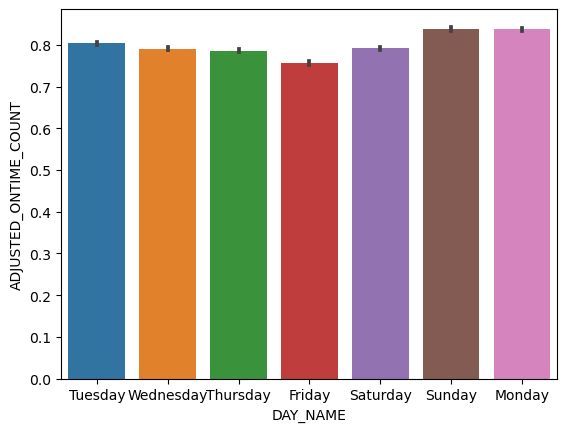

In [121]:
sns.barplot(wego_hdwy, x='DAY_NAME', y='ADJUSTED_ONTIME_COUNT')

In [163]:
#Percentage of on time by day.
(wego_clean
 .groupby('DAY_NAME')
 [['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
 .mean()
)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
DAY_NAME,,,
Friday,0.756604,0.027943,0.215453
Monday,0.841206,0.033269,0.125525
Saturday,0.797629,0.021667,0.180705
Sunday,0.846369,0.030194,0.123437
Thursday,0.784857,0.027551,0.187592
Tuesday,0.803493,0.027927,0.168580
Wednesday,0.791478,0.028685,0.179837


In [165]:
#Percentage of HDWY by day.
(wego_hdwy
 .groupby('DAY_NAME')
 [['NORMAL_HDWY','GAPPING','BUNCHING']]
 .mean()
)

,NORMAL_HDWY,GAPPING,BUNCHING
DAY_NAME,,,
Friday,0.803842,0.105631,0.089947
Monday,0.875584,0.064922,0.058707
Saturday,0.923848,0.044617,0.031391
Sunday,0.938135,0.040806,0.020109
Thursday,0.828317,0.093102,0.078052
Tuesday,0.844974,0.083271,0.071391
Wednesday,0.838261,0.085299,0.075942


In [166]:
#Percentage of on time by hour.
(wego_clean
 .groupby('HOUR')
 [['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
 .mean()
)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
HOUR,,,
0,0.718494,0.088371,0.193135
1,0.513514,0.234234,0.252252
4,0.936574,0.040901,0.022525
5,0.923647,0.035571,0.040782
6,0.900309,0.027122,0.072569
7,0.812881,0.023713,0.163407
8,0.758470,0.019079,0.222452
9,0.839944,0.028553,0.131504
10,0.858531,0.036677,0.104792


In [167]:
#Percentage of HDWY by hour.
(wego_hdwy
 .groupby('HOUR')
 [['NORMAL_HDWY','GAPPING','BUNCHING']]
 .mean()
)

,NORMAL_HDWY,GAPPING,BUNCHING
HOUR,,,
0,0.920796,0.043919,0.035285
1,0.571429,0.285714,0.142857
4,0.992095,0.000000,0.000000
5,0.949796,0.026459,0.015265
6,0.908585,0.052387,0.036540
7,0.849268,0.087487,0.061585
8,0.814355,0.092575,0.092575
9,0.863352,0.068605,0.068043
10,0.877571,0.066786,0.055644


# ANSWER: 

# Q4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [168]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333924 entries, 0 to 350328
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                333924 non-null  int64         
 1   SERVICE_ABBR               333924 non-null  int64         
 2   ADHERENCE_ID               333924 non-null  int64         
 3   DATE                       333924 non-null  object        
 4   ROUTE_ABBR                 333924 non-null  int64         
 5   BLOCK_ABBR                 333924 non-null  int64         
 6   OPERATOR                   333924 non-null  int64         
 7   TRIP_ID                    333924 non-null  int64         
 8   OVERLOAD_ID                333924 non-null  int64         
 9   ROUTE_DIRECTION_NAME       333924 non-null  object        
 10  TIME_POINT_ABBR            333924 non-null  object        
 11  ROUTE_STOP_SEQUENCE        333919 non-null  float64      

In [171]:
wego_clean.OPERATOR.unique()

array([1040, 2374, 2689, 1617, 2427, 1892, 1190, 1222, 2355, 2125, 2649,
       1761, 1893, 2041, 1170, 1823, 1198, 1147,  522, 2603,  409, 2958,
       2088, 2348, 2706, 1368, 3100, 2529, 1237, 1992, 2059, 2441, 1204,
        326, 2177,  559, 2963, 1948, 2230, 1703, 2569, 2055, 2675, 2752,
        517, 2586, 2623,  907, 1682, 1619, 1133,  659, 1266, 1623, 1938,
       1410, 1705, 1927, 1391, 2629,  304,  357, 2500, 2112, 1505, 1904,
       1052, 1800, 2253, 1489, 1542, 2624, 2062,  359, 1582, 2428,  332,
       2967, 3016, 2760, 2584, 1206, 2399, 3124, 2109, 1208, 3012, 1361,
       2990, 1650, 1359,  611, 1590, 2832, 2560,  520, 2371, 1175, 2200,
       1352, 2714, 1500, 2817, 3096, 1958, 2458, 1601, 1343, 2217, 1866,
       2987, 1372, 2792, 1330, 2733, 1713, 1406, 2780,  471, 2638, 1780,
       1177, 2221, 1743,  572, 2400,  341, 2312,  778, 2697,  723, 2324,
       2164, 2618, 2563, 2809, 2448, 1762, 1401, 2352,  414, 2357, 2545,
       2306, 3088, 3015, 2703,  624, 1566, 2040, 31

In [178]:
wego_clean['OPERATOR'].value_counts()

OPERATOR
1266    2814
1147    2679
1133    2602
2352    2542
2424    2472
304     2423
2399    2405
1927    2387
409     2364
332     2357
2246    2346
2760    2330
1762    2318
1368    2318
1650    2292
1410    2275
2733    2247
2706    2236
379     2219
1566    2199
2780    2172
1582    2169
1623    2168
520     2129
1761    2122
1170    2120
326     2113
1204    2105
1824    2103
1823    2079
1590    2077
1914    2076
1401    2058
2109    2055
329     2042
559     2023
3031    2008
1237    1993
2088    1964
2638    1957
2062    1952
1372    1940
2001    1939
3090    1937
659     1903
2990    1898
2630    1894
2164    1884
1361    1860
1992    1856
3064    1852
2012    1842
2053    1829
1343    1828
1208    1816
522     1813
1788    1781
1500    1768
517     1763
1190    1756
2082    1753
1792    1748
1052    1734
1040    1725
2793    1722
1177    1716
2055    1698
1352    1685
2374    1674
1222    1660
1893    1659
1617    1650
785     1634
1800    1618
2567    1616
778     1590
130

In [185]:
operator_1266 = wego_clean[wego_clean['OPERATOR']==1266]
operator_1266.count()

CALENDAR_ID                  2814
SERVICE_ABBR                 2814
ADHERENCE_ID                 2814
DATE                         2814
ROUTE_ABBR                   2814
BLOCK_ABBR                   2814
OPERATOR                     2814
TRIP_ID                      2814
OVERLOAD_ID                  2814
ROUTE_DIRECTION_NAME         2814
TIME_POINT_ABBR              2814
ROUTE_STOP_SEQUENCE          2814
TRIP_EDGE                    2814
LATITUDE                     2814
LONGITUDE                    2814
SCHEDULED_TIME               2814
ACTUAL_ARRIVAL_TIME          2814
ACTUAL_DEPARTURE_TIME        2814
ADHERENCE                    2814
SCHEDULED_HDWY               2340
ACTUAL_HDWY                  2340
HDWY_DEV                     2340
ADJUSTED_EARLY_COUNT         2814
ADJUSTED_LATE_COUNT          2814
ADJUSTED_ONTIME_COUNT        2814
STOP_CANCELLED               2814
PREV_SCHED_STOP_CANCELLED    2340
IS_RELIEF                    2814
DWELL_IN_MINS                2814
SCHEDULED_LAYO